In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
93,93,6.8,112.0,1
90,90,7.3,86.0,1
80,80,4.9,196.0,0
30,30,7.6,128.0,1
51,51,4.8,141.0,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

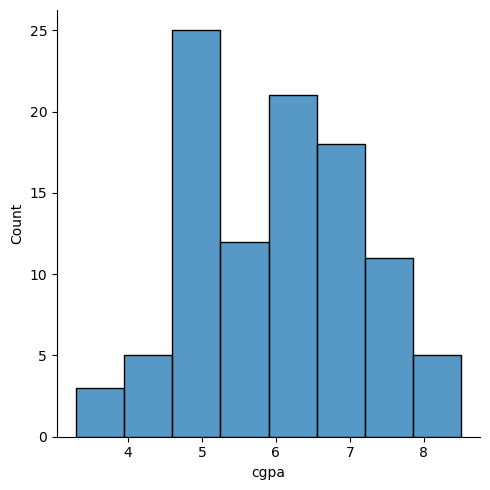

In [6]:
sns.displot(df['cgpa'])

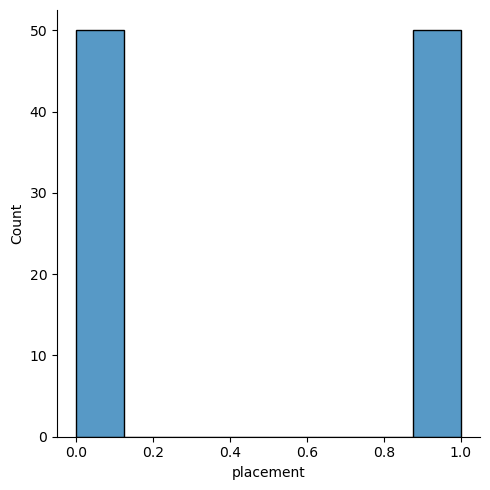

In [7]:
sns.displot(df['placement'])

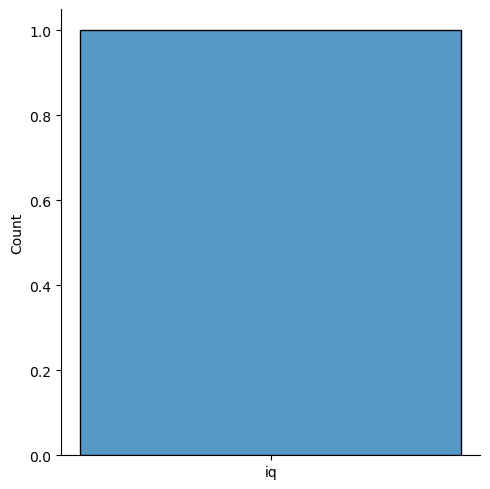

In [8]:
sns.displot('iq')

<Axes: ylabel='cgpa'>

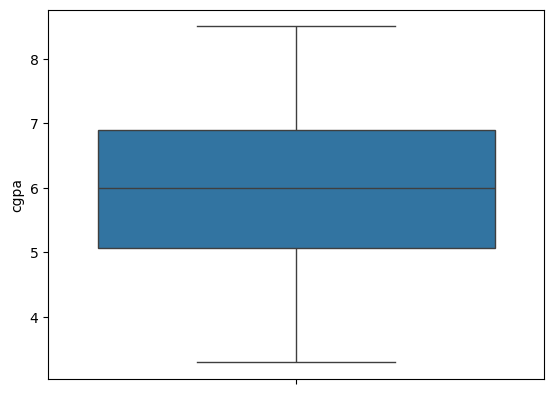

In [10]:
sns.boxplot(df['cgpa'])

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [13]:
df=df.iloc[:,1:]

In [14]:
df.sample(5)

,cgpa,iq,placement
74,6.7,154.0,1
77,7.3,50.0,1
10,6.0,45.0,1
73,4.9,61.0,0
79,6.5,90.0,1


In [15]:
X=df.drop(columns='placement')
y=df['placement']

In [16]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train

,cgpa,iq
43,6.8,141.0
62,6.0,102.0
3,7.4,132.0
71,6.1,132.0
45,6.0,66.0
...,...,...
96,4.4,42.0
67,5.0,118.0
64,7.0,64.0
47,5.2,161.0


In [21]:
y_test

26    1
86    0
2     0
55    1
75    0
93    1
16    0
73    0
54    1
95    0
53    1
92    0
78    0
13    1
7     0
30    1
22    0
24    0
33    0
8     0
Name: placement, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()

In [25]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [26]:
X_train_scaled

array([[ 0.68722958,  0.51773529],
       [-0.01313178, -0.48995909],
       [ 1.21250059,  0.28519043],
       [ 0.07441339,  0.28519043],
       [-0.01313178, -1.42013852],
       [ 0.51213924,  0.44022033],
       [-0.27576728,  0.56941192],
       [ 0.16195856, -0.2057376 ],
       [ 0.42459407, -2.16944973],
       [-0.97612864,  0.87947173],
       [ 0.77477475,  0.46605865],
       [-0.97612864,  1.93884275],
       [ 1.12495542, -0.90337217],
       [-1.76403516, -1.18759367],
       [-1.06367381,  0.51773529],
       [-0.01313178,  0.07848389],
       [-1.76403516, -0.54163573],
       [ 0.07441339, -1.44597684],
       [ 0.24950373,  0.18183716],
       [ 0.59968441,  0.85363341],
       [-0.10067694, -0.38660582],
       [ 1.12495542,  0.41438202],
       [ 1.38759093, -0.82585722],
       [-0.53840279, -0.17989929],
       [-0.18822211,  0.5435736 ],
       [-0.8010383 ,  1.4220764 ],
       [-2.37685134,  1.60294462],
       [-0.97612864,  0.33686706],
       [ 0.42459407,

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [29]:
model.fit(X_train_scaled,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
y_pred=model.predict(X_test_scaled)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print("accuracy score :",accuracy_score(y_pred,y_test))

accuracy score : 0.85


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
np.mean(cross_val_score(model,X,y,cv=10))

np.float64(0.9)

In [35]:
import pickle

In [36]:
pickle.dump(model,open('model.pkl','wb'))